In [2]:
#importando as bibliotecas necessárias para a análise

import requests
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#fazendo a conexão com a api "CryptoCompare" 

URL = 'https://min-api.cryptocompare.com/data/v2/histoday'
params = {
    'fsym': 'BTC',
    'tsym': 'USD',
    'limit': 365, 
    'aggregate': 1, 
    'toTs': pd.Timestamp('2022-12-31').timestamp(),
    'api_key': 'e7da565b8e43bea11ef757b5d5b919a326e1e79a4a229e4162cd15ae0c1cf1e5'
}

# fsym = sigla referente a criptmoeda que você deseja os dados
# tsym = paridade da moeda ex: USD = dolar , BRL = Real
#limit = defina o histórico de quantos dias você deseja consumir
#agreggate = retorna os dados diários
#tots = defina a data final dos dados



In [6]:
#consumindo os dados da api e manipulando para um DataFrame

response = requests.get(URL, params=params)
data = response.json()['Data']['Data']
df = pd.DataFrame(data)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

df


,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2021-12-31,48573.22,45665.44,47129.66,34737.79,1.636014e+09,46197.31,direct,
2022-01-01,47950.29,46196.03,46197.31,16697.92,7.867300e+08,47737.35,direct,
2022-01-02,47979.26,46666.18,47737.35,13025.66,6.154534e+08,47306.41,direct,
2022-01-03,47572.23,45707.55,47306.41,21681.38,1.011310e+09,46450.79,direct,
2022-01-04,47529.48,45587.91,46450.79,29035.93,1.349229e+09,45824.54,direct,
...,...,...,...,...,...,...,...,...
2022-12-27,16960.30,16606.04,16916.07,42994.72,7.209562e+08,16700.54,direct,
2022-12-28,16767.99,16471.35,16700.54,54253.61,9.015839e+08,16540.47,direct,
2022-12-29,16650.11,16487.13,16540.47,41148.04,6.824715e+08,16631.24,direct,


In [7]:
#calculando a média de preço do BTC no ano de 2022
# utilizo a coluna close, pois é a coluna onde contem os valores de fechamentos diários do btc

media_2022 = df['close'].mean()
print(f'A média de preço do Bitcoin em 2022 foi de : ${media_2022:.2f}')




A média de preço do Bitcoin em 2022 foi de : $28235.21


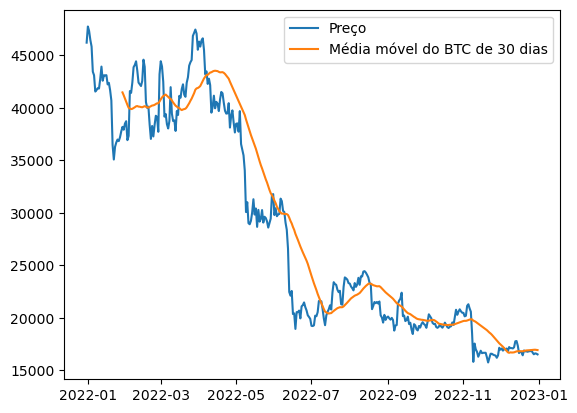

In [8]:
#criando os gráficos de média móveis com o plot.


media_moveis = df['close'].rolling(window=30).mean()

plt.plot(df.index, df['close'], label='Preço')
plt.plot(media_moveis.index, media_moveis, label='Média móvel do BTC de 30 dias')
plt.legend()
plt.show()